### Importing Libraries

In [1]:
import yaml
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


2022-10-07 16:13:15.527722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-07 16:13:15.668269: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-07 16:13:16.363983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/anwer/anaconda3/lib/
2022-10-07 16:13:16.364036: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

### Defining Path

In [2]:
def path_trials():
    with open('config.yaml') as f:
        config_file = yaml.load(f, Loader = yaml.FullLoader) 
    no_of_trials = config_file['training_config']['max_trials']
    model_result_dir = os.path.join("results",config_file['input_files']['models'].split("/")[1].split(".")[0]+"_results")
    path_of_trials_csv = [os.path.join(model_result_dir,f"trial_{i}",f"trial_{i}_result.csv") for i in range(no_of_trials)]
    return path_of_trials_csv

### Function for plotting

In [3]:
def trial_analysis(trial_no = 0,model_summary = False):
    path_of_trials_csv = path_trials()
    model = None
    data = pd.read_csv(path_of_trials_csv[trial_no])
    if model_summary:
        model_path = path_of_trials_csv[trial_no][:-10]+"model.h5"
        model = keras.models.load_model(model_path)
        
    return data,model



def plot(L, ax,column = 'loss'):
   
    ax.plot(L[column],label=column)
    ax.legend()
    ax.set_xlabel(r'Epochs',
              fontweight ='bold')
    ax.set_title(f"Epoch vs {column}",
             fontsize = 10)
    return L




Trial 0
    Epochs       loss  mean_squared_error   val_loss  val_mean_squared_error
0  Epoch 1  22.387362          599.022766  22.255768              574.731262
1  Epoch 2  21.574095          562.322327  21.229053              530.610474
2  Epoch 3  20.358278          511.830078  19.386204              458.326752
3  Epoch 4  18.093708          432.043365  16.022425              346.870941
4  Epoch 5  14.297384          315.587097  11.454855              227.141998
Model not available


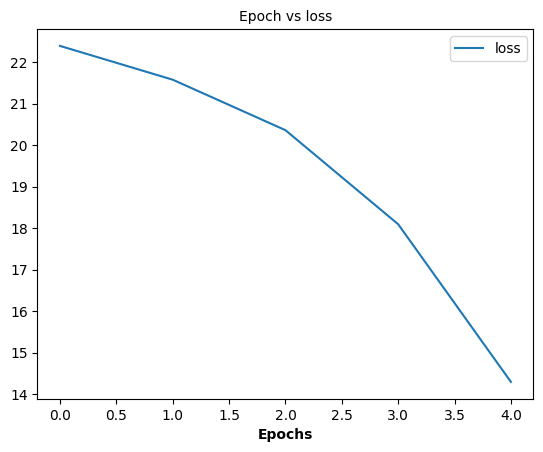

In [9]:
trial_no = 0
print(f"Trial {trial_no}")
data,model = trial_analysis(trial_no,model_summary=False)
print(data.head())
try:
    model.summary()
except:
    print("Model not available")

f, ax = plt.subplots(1, 1)
_plot = plot(data, ax)   


Trial 2
    Epochs       loss  mean_squared_error   val_loss  val_mean_squared_error
0  Epoch 1  24.595997          582.219421  17.911705              345.914825
1  Epoch 2  17.495081          351.412292  12.277086              200.958542
2  Epoch 3  12.667545          212.324631  11.164573              148.069305
3  Epoch 4  11.975094          164.375885   9.768312              112.675995
4  Epoch 5  10.711849          130.975159   8.050296               87.187744
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13, 32)            64        
                                                                 
 dense_1 (Dense)             (None, 13, 256)           8448      
                                                                 
 dense_2 (Dense)             (None, 13, 288)           74016     
                                                

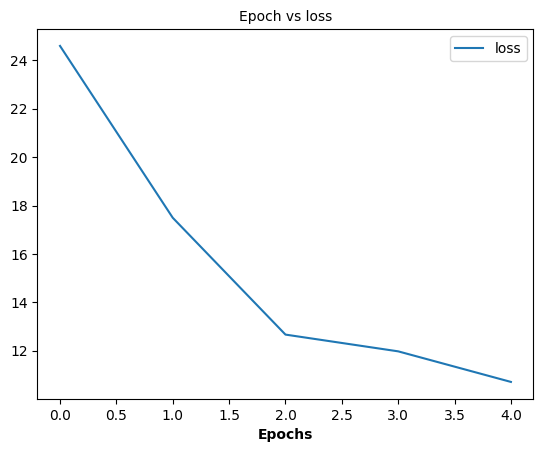

In [10]:
trial_no = 2
data,model = trial_analysis(trial_no,model_summary=True)
print(f"Trial {trial_no}")
print(data.head())
try:
    model.summary()
except:
    print("Model not available")

f, ax = plt.subplots(1, 1)
_plot = plot(data, ax)  